# CLUSTERING

## 1. Clustering con todas las variables

In [81]:
from sklearn.cluster import KMeans
import pandas as pd

In [82]:
Tabla_final_NBA = pd.read_csv('Tabla_final_NBA.csv')
Tabla_final_NBA

,Unnamed: 0,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS
0,0,Denver Nuggets,37.2,84.8,0.438,7.0,22.5,0.311,30.2,62.3,...,0.785,10.0,33.2,43.2,23.8,6.5,6.7,18.7,23.5,107.2
1,1,Golden State Warriors,39.0,84.4,0.462,8.7,22.3,0.388,30.3,62.1,...,0.732,11.5,30.3,41.8,21.8,8.6,3.5,13.2,21.9,102.5
2,2,San Antonio Spurs,38.0,82.2,0.463,7.9,20.8,0.378,30.2,61.4,...,0.693,11.7,32.0,43.6,19.8,7.3,4.7,13.6,21.1,93.3
3,3,Houston Rockets,34.3,81.0,0.424,11.7,33.7,0.347,22.7,47.3,...,0.848,9.7,32.8,42.5,20.2,7.8,7.3,12.8,24.7,105.8
4,4,Brooklyn Nets,37.0,83.7,0.442,6.1,19.4,0.316,30.9,64.3,...,0.694,10.7,31.0,41.7,21.4,6.0,5.7,13.1,21.7,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,Toronto Raptors,38.3,86.0,0.446,9.8,32.8,0.299,28.5,53.2,...,0.849,8.3,33.5,41.8,24.0,5.2,4.8,14.5,20.3,111.5
156,156,Milwaukee Bucks,38.5,88.0,0.438,10.6,32.3,0.327,27.9,55.7,...,0.806,7.8,35.4,43.3,24.0,6.7,5.5,12.8,20.2,101.3
157,157,Utah Jazz,35.0,79.0,0.443,8.2,29.8,0.274,26.8,49.2,...,0.789,6.0,31.7,37.7,19.3,6.5,2.3,8.7,23.2,104.7
158,158,Atlanta Hawks,34.4,78.2,0.440,11.4,35.0,0.326,23.0,43.2,...,0.783,8.2,31.8,40.0,25.4,9.4,3.0,13.2,23.4,109.4


In [83]:
del Tabla_final_NBA['Unnamed: 0']
Tabla_final_NBA.columns

Index(['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'CHAMP', 'posicion', 'SEASON', 'Opp FG', 'Opp FGA',
       'Opp FG%', 'Opp 3P', 'Opp 3PA', 'Opp 3P%', 'Opp 2P', 'Opp 2PA',
       'Opp 2P%', 'Opp FT', 'Opp FTA', 'Opp FT%', 'Opp ORB', 'Opp DRB',
       'Opp TRB', 'Opp AST', 'Opp STL', 'Opp BLK', 'Opp TOV', 'Opp PF',
       'Opp PTS'],
      dtype='object')

In [84]:
# En primer lugar borramos las columnas de tipo cadena, y la columna CHAMP ya que no queremos clasificar segun hayan sido campeon o no
Tabla_cluster_completa = Tabla_final_NBA.drop(columns = {'Team','CHAMP','SEASON'})
Tabla_cluster_completa.columns

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'posicion', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA',
       'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA',
       'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL',
       'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp PTS'],
      dtype='object')

In [85]:
# Hacemos clustering

kmeans = KMeans(n_clusters=4)        # especifica el número de clusters deseado
kmeans.fit(Tabla_cluster_completa)
cluster_labels = kmeans.labels_

In [65]:
# Guardamos el cluster en una nueva columna y vemos a que cluster pertenecen los equipos que han 
# salido campeones alguno de los ultimos 10 años

Tabla_final_NBA['cluster'] = cluster_labels
Tabla_final_NBA[Tabla_final_NBA['CHAMP'] == 1][['Team','cluster','CHAMP']]

,Team,cluster,CHAMP
6,Miami Heat,3,1
19,San Antonio Spurs,3,1
36,Golden State Warriors,0,1
51,Cleveland Cavaliers,1,1
64,Golden State Warriors,0,1
80,Golden State Warriors,1,1
104,Toronto Raptors,1,1
115,Los Angeles Lakers,1,1
136,Milwaukee Bucks,1,1
145,Golden State Warriors,1,1


Vemos clusters diversos, pero ninguno de ellos en el 2

##### ¿Qué pasa si a esta tabla le añadimos los equipos finalistas de este año, los Denver Nuggets y los Miami Heat? Veámoslo:

In [104]:
Tabla_final_2023 = pd.read_excel('Tabla_final_2023.xlsx')

In [105]:
Tabla_final_2023 = Tabla_final_2023[((Tabla_final_2023['Team'] == 'Denver Nuggets 2023') | (Tabla_final_2023['Team'] == 'Miami Heat 2023'))]

In [106]:
Tabla_final_2023

,Unnamed: 0,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,posicion
5,5,Denver Nuggets 2023,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,...,7.9,30.5,38.3,23.5,5.5,4.8,11.5,21.4,108.1,1
9,9,Miami Heat 2023,40.8,86.5,0.472,13.1,33.6,0.390,27.7,52.9,...,10.8,32.7,43.5,22.5,5.7,4.6,13.8,19.5,107.4,8


In [107]:
Tabla_final_2023_cluster = Tabla_final_2023.copy()
del Tabla_final_2023_cluster['Team']
del Tabla_final_2023_cluster['Unnamed: 0']

In [108]:
Tabla_final_2023_cluster

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,posicion
5,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,0.548,17.9,...,7.9,30.5,38.3,23.5,5.5,4.8,11.5,21.4,108.1,1
9,40.8,86.5,0.472,13.1,33.6,0.390,27.7,52.9,0.524,16.9,...,10.8,32.7,43.5,22.5,5.7,4.6,13.8,19.5,107.4,8


In [109]:
Tabla_prueba_cluster = pd.merge(Tabla_cluster_completa, Tabla_final_2023_cluster, how='outer')

In [110]:
Tabla_prueba_cluster.isnull().sum().sum()

0

In [111]:
# Hacemos clustering

kmeans = KMeans(n_clusters=4)        # especifica el número de clusters deseado
kmeans.fit(Tabla_prueba_cluster)
cluster_labels = kmeans.labels_

In [112]:
Tabla_prueba_cluster_2 = pd.merge(Tabla_final_NBA, Tabla_final_2023, how='outer')

In [113]:
Tabla_prueba_cluster_2

,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,Unnamed: 0
0,Denver Nuggets,37.2,84.8,0.438,7.0,22.5,0.311,30.2,62.3,0.484,...,10.0,33.2,43.2,23.8,6.5,6.7,18.7,23.5,107.2,NaN
1,Golden State Warriors,39.0,84.4,0.462,8.7,22.3,0.388,30.3,62.1,0.489,...,11.5,30.3,41.8,21.8,8.6,3.5,13.2,21.9,102.5,NaN
2,San Antonio Spurs,38.0,82.2,0.463,7.9,20.8,0.378,30.2,61.4,0.492,...,11.7,32.0,43.6,19.8,7.3,4.7,13.6,21.1,93.3,NaN
3,Houston Rockets,34.3,81.0,0.424,11.7,33.7,0.347,22.7,47.3,0.479,...,9.7,32.8,42.5,20.2,7.8,7.3,12.8,24.7,105.8,NaN
4,Brooklyn Nets,37.0,83.7,0.442,6.1,19.4,0.316,30.9,64.3,0.480,...,10.7,31.0,41.7,21.4,6.0,5.7,13.1,21.7,97.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Utah Jazz,35.0,79.0,0.443,8.2,29.8,0.274,26.8,49.2,0.546,...,6.0,31.7,37.7,19.3,6.5,2.3,8.7,23.2,104.7,NaN
158,Atlanta Hawks,34.4,78.2,0.440,11.4,35.0,0.326,23.0,43.2,0.532,...,8.2,31.8,40.0,25.4,9.4,3.0,13.2,23.4,109.4,NaN
159,Chicago Bulls,36.4,90.2,0.404,10.4,36.8,0.283,26.0,53.4,0.487,...,8.2,43.6,51.8,23.4,6.4,4.8,15.4,17.8,109.8,NaN
160,Denver Nuggets 2023,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,0.548,...,7.9,30.5,38.3,23.5,5.5,4.8,11.5,21.4,108.1,5.0


In [118]:
# Guardamos el cluster en una nueva columna y vemos a que cluster pertenecen tanto los equipos que han 
# salido campeones alguno de los ultimos 10 años como  Denver y Miami de 2023

Tabla_prueba_cluster_2['cluster'] = cluster_labels
Tabla_prueba_cluster_2.loc[Tabla_prueba_cluster_2['Team'] == 'Miami Heat 2023', 'SEASON'] = 11
Tabla_prueba_cluster_2.loc[Tabla_prueba_cluster_2['Team'] == 'Denver Nuggets 2023', 'SEASON'] = 11
filtro_final = Tabla_prueba_cluster_2[(Tabla_prueba_cluster_2['CHAMP'] == 1) | ((Tabla_prueba_cluster_2['Team'] == 'Denver Nuggets 2023') | (Tabla_prueba_cluster_2['Team'] == 'Miami Heat 2023'))][['Team','cluster','SEASON']]
filtro_final

,Team,cluster,SEASON
6,Miami Heat,1,1.0
19,San Antonio Spurs,1,2.0
36,Golden State Warriors,1,3.0
51,Cleveland Cavaliers,3,4.0
64,Golden State Warriors,2,5.0
80,Golden State Warriors,2,6.0
104,Toronto Raptors,3,7.0
115,Los Angeles Lakers,2,8.0
136,Milwaukee Bucks,2,9.0
145,Golden State Warriors,2,10.0


Veamos ahora si esta nueva columna 'cluster' tiene alguna correlacion con la columna a predecir después

In [7]:
corr_matrix = Tabla_final_NBA.corr()
corr_matrix['CHAMP'].sort_values(ascending= False)

CHAMP       1.000000e+00
AST         2.779732e-01
FG%         2.751249e-01
2P%         2.701212e-01
FG          2.356186e-01
STL         2.022918e-01
PTS         1.875577e-01
3P%         1.721625e-01
Opp TOV     1.310921e-01
3P          1.281837e-01
DRB         1.064478e-01
2P          1.032588e-01
TRB         1.015815e-01
BLK         8.739566e-02
3PA         8.315521e-02
ORB         1.976629e-02
FGA         1.874676e-02
cluster     1.735961e-02
FT%         7.437297e-03
Opp 3PA     1.096029e-03
SEASON      2.345338e-17
Opp STL    -1.030664e-02
TOV        -1.282013e-02
Opp 2PA    -1.618870e-02
Opp FGA    -1.965073e-02
Opp ORB    -2.638619e-02
Opp FT%    -2.721933e-02
Opp 3P     -4.241285e-02
Opp PF     -6.968402e-02
2PA        -7.737353e-02
PF         -8.046818e-02
FT         -8.369788e-02
Opp FTA    -9.103236e-02
FTA        -9.196195e-02
Opp FT     -1.015138e-01
Opp AST    -1.075474e-01
Opp 3P%    -1.162334e-01
Opp 2P     -1.181410e-01
Opp TRB    -1.419273e-01
Opp DRB    -1.497478e-01


Vemos que solo correla un 2,7%, lo cual tiene sentido ya que es una columna linealmente dependiente, obtenida de todas las otras, en nuestro caso esperaba que correlase incluso menos

## 2. Clustering con 2 variables

### 2.1. Asistencias vs Pérdidas

In [8]:
Tabla_cluster_2 = Tabla_final_NBA[['AST','TOV']]
Tabla_cluster_2

,AST,TOV
0,21.2,14.5
1,21.7,16.5
2,21.9,12.9
3,18.0,15.8
4,19.9,11.6
...,...,...
155,20.7,10.0
156,20.8,13.8
157,17.2,11.8
158,18.6,16.4


In [9]:
import numpy as np

# Tomamos ahora 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(Tabla_cluster_2)

# Obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Imprimir los resultados
print("Etiquetas de los clusters:", labels)
print("Centroides:", centroids)

Etiquetas de los clusters: [1 2 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 2 2 1 0 0 1 0 1 0 0 0 0 0 1 1 1 2 1 2 2
 2 2 0 2 1 1 1 1 1 0 1 2 1 1 1 1 2 1 0 1 1 1 0 0 0 0 0 2 1 1 2 0 1 2 2 1 0
 1 0 1 0 1 1 2 2 2 1 2 0 1 2 0 1 1 1 0 1 1 1 2 2 2 0 1 1 2 0 1 2 1 1 1 2 0
 1 1 1 1 2 2 2 2 2 1 2 2 0 2 0 2 0 1 1 2 1 2 1 1 1 1 1 1 1 1 1 0 0 2 2 2 1
 2 2 2 1 2 1 1 1 1 0 0 2]
Centroides: [[17.94883721 14.28604651]
 [21.00694444 12.43055556]
 [24.31777778 14.38222222]]


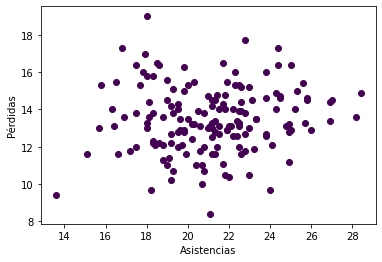

In [10]:
#Representamos
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar los puntos de datos según las etiquetas de los clusters
for i, label in enumerate(labels):
    ax.scatter(Tabla_cluster_2.iloc[i, 0], Tabla_cluster_2.iloc[i, 1], c=label)

# Configurar etiquetas de los ejes
ax.set_xlabel('Asistencias')
ax.set_ylabel('Pérdidas')

# Mostrar el gráfico
plt.show()

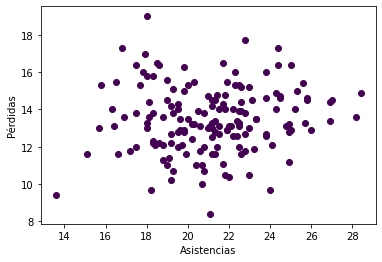

In [11]:
#Representamos
import matplotlib.pyplot as plt
# Crear figura y ejes
fig, ax = plt.subplots()
# Graficar los puntos de datos según las etiquetas de los clusters
for i, label in enumerate(labels):
    ax.scatter(Tabla_cluster_2.iloc[i, 0], Tabla_cluster_2.iloc[i, 1], c=label)
# Configurar etiquetas de los ejes
ax.set_xlabel('Asistencias')
ax.set_ylabel('Pérdidas')
# Mostrar el gráfico
plt.show()

In [12]:
Tabla_final_NBA['cluster_2'] = labels
Tabla_final_NBA[Tabla_final_NBA['CHAMP'] == 1][['Team','cluster_2','SEASON']]

,Team,cluster_2,SEASON
6,Miami Heat,1,1
19,San Antonio Spurs,1,2
36,Golden State Warriors,2,3
51,Cleveland Cavaliers,1,4
64,Golden State Warriors,2,5
80,Golden State Warriors,2,6
104,Toronto Raptors,1,7
115,Los Angeles Lakers,2,8
136,Milwaukee Bucks,1,9
145,Golden State Warriors,2,10


## 3. Clustering con 3 variables

En este caso tomamos para el clustering 3 de las variables que más correlan con ganar el campeonato: Asistencias, Porcentaje de tiros y porcentaje del oponente

In [13]:
Tabla_cluster_3 = Tabla_final_NBA[['AST','FG%','Opp FG%']]
Tabla_cluster_3

,AST,FG%,Opp FG%
0,21.2,0.438,0.494
1,21.7,0.462,0.439
2,21.9,0.463,0.432
3,18.0,0.424,0.450
4,19.9,0.442,0.469
...,...,...,...
155,20.7,0.446,0.488
156,20.8,0.438,0.421
157,17.2,0.443,0.444
158,18.6,0.440,0.465


In [14]:
import numpy as np

# Tomamos ahora 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(Tabla_cluster_3)

# Obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Imprimir los resultados
print("Etiquetas de los clusters:", labels)
print("Centroides:", centroids)

Etiquetas de los clusters: [1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 0 0
 1 1 2 0 1 2 1 2 1 2 1 0 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 0 1 1 1 2 1 1 0 2 2
 2 2 2 2 2 1 0 0 0 1 1 2 2 0 1 1 1 1 2 2 1 2 0 0 0 2 2 0 0 2 1 1 1 1 1 1 2
 1 1 1 1 0 0 0 1 0 1 1 0 2 0 2 1 2 1 2 0 1 0 1 1 1 1 1 1 1 1 1 2 2 0 0 0 1
 1 1 0 2 0 1 1 1 1 2 2 1]
Centroides: [[25.2         0.45766667  0.45286667]
 [21.75571429  0.45007143  0.45564286]
 [18.32833333  0.43216667  0.45741667]]


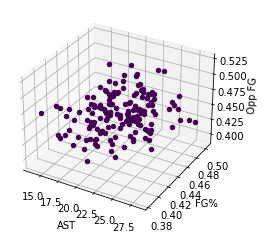

In [15]:
#Representamos ahora en 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos según las etiquetas de los clusters
for i, label in enumerate(labels):
    ax.scatter(Tabla_cluster_3.iloc[i, 0], Tabla_cluster_3.iloc[i, 1], Tabla_cluster_3.iloc[i, 2], c=label)

# Configurar etiquetas de los ejes
ax.set_xlabel('AST')
ax.set_ylabel('FG%')
ax.set_zlabel('Opp FG')

# Mostrar el gráfico
plt.show()

In [16]:
Tabla_final_NBA['cluster_3'] = labels
Tabla_final_NBA[Tabla_final_NBA['CHAMP'] == 1][['Team','cluster_3','SEASON']]

,Team,cluster_3,SEASON
6,Miami Heat,1,1
19,San Antonio Spurs,1,2
36,Golden State Warriors,0,3
51,Cleveland Cavaliers,1,4
64,Golden State Warriors,0,5
80,Golden State Warriors,0,6
104,Toronto Raptors,1,7
115,Los Angeles Lakers,0,8
136,Milwaukee Bucks,1,9
145,Golden State Warriors,0,10


Vemos que todos pertenecen al cluster 1 o 2, y los golden state warriors siempre pertenecen al cluster 2, lo cual nos indica que siempre han mantenido un mismo estilo de juego

## 4. Clustering 2023

### 4.1. Cargamos los datos de 2023 y los preparamos

In [17]:
#Cargamos la tabla guardada de 2023
Tabla_final_2023 = pd.read_excel('Tabla_final_2023.xlsx')
Tabla_final_2023

,Unnamed: 0,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,posicion
0,0,Milwaukee Bucks 2023,44.0,92.6,0.475,15.6,41.2,0.379,28.4,51.4,...,7.4,35.2,42.6,25.2,8.8,3.4,14.8,20.4,124.0,1
1,1,Atlanta Hawks 2023,44.0,96.3,0.457,14.0,37.3,0.375,30.0,59.0,...,8.7,36.3,45.0,27.3,6.5,7.2,12.8,16.5,121.2,7
2,2,Los Angeles Clippers 2023,40.8,88.6,0.460,12.2,33.8,0.361,28.6,54.8,...,10.6,32.2,42.8,26.6,8.6,6.2,12.2,21.2,122.0,5
3,3,Phoenix Suns 2023,43.1,86.8,0.496,9.4,25.8,0.363,33.7,61.0,...,11.2,31.0,42.2,23.6,7.3,4.0,12.4,20.8,116.5,4
4,4,Sacramento Kings 2023,41.0,95.6,0.429,12.1,39.7,0.306,28.9,55.9,...,12.0,34.4,46.4,27.0,8.9,5.6,14.4,22.7,115.9,3
5,5,Denver Nuggets 2023,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,...,7.9,30.5,38.3,23.5,5.5,4.8,11.5,21.4,108.1,1
6,6,Golden State Warriors 2023,41.9,93.6,0.448,14.5,42.5,0.340,27.5,51.1,...,11.3,34.6,45.9,23.2,7.5,4.6,12.6,19.6,113.2,6
7,7,Los Angeles Lakers 2023,41.1,87.1,0.471,10.1,30.3,0.335,30.9,56.9,...,12.5,33.8,46.3,26.8,5.9,3.8,13.1,21.3,109.9,7
8,8,Boston Celtics 2023,40.9,85.5,0.478,14.1,38.7,0.364,26.8,46.9,...,9.8,31.6,41.3,21.2,7.4,4.7,12.4,17.7,108.6,2
9,9,Miami Heat 2023,40.8,86.5,0.472,13.1,33.6,0.390,27.7,52.9,...,10.8,32.7,43.5,22.5,5.7,4.6,13.8,19.5,107.4,8


In [18]:
del Tabla_final_2023['Unnamed: 0']

In [19]:
#Eliminamos el año de la columna Team
for i in range(len(Tabla_final_2023['Team'])):
    Tabla_final_2023['Team'][i] = Tabla_final_2023['Team'][i][:-4]
    
Tabla_final_2023

C:\Users\mario\AppData\Local\Temp\ipykernel_22484\1634630659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_final_2023['Team'][i] = Tabla_final_2023['Team'][i][:-4]


,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,posicion
0,Milwaukee Bucks,44.0,92.6,0.475,15.6,41.2,0.379,28.4,51.4,0.553,...,7.4,35.2,42.6,25.2,8.8,3.4,14.8,20.4,124.0,1
1,Atlanta Hawks,44.0,96.3,0.457,14.0,37.3,0.375,30.0,59.0,0.508,...,8.7,36.3,45.0,27.3,6.5,7.2,12.8,16.5,121.2,7
2,Los Angeles Clippers,40.8,88.6,0.460,12.2,33.8,0.361,28.6,54.8,0.522,...,10.6,32.2,42.8,26.6,8.6,6.2,12.2,21.2,122.0,5
3,Phoenix Suns,43.1,86.8,0.496,9.4,25.8,0.363,33.7,61.0,0.553,...,11.2,31.0,42.2,23.6,7.3,4.0,12.4,20.8,116.5,4
4,Sacramento Kings,41.0,95.6,0.429,12.1,39.7,0.306,28.9,55.9,0.517,...,12.0,34.4,46.4,27.0,8.9,5.6,14.4,22.7,115.9,3
5,Denver Nuggets,43.2,88.1,0.490,12.1,31.4,0.386,31.1,56.7,0.548,...,7.9,30.5,38.3,23.5,5.5,4.8,11.5,21.4,108.1,1
6,Golden State Warriors,41.9,93.6,0.448,14.5,42.5,0.340,27.5,51.1,0.538,...,11.3,34.6,45.9,23.2,7.5,4.6,12.6,19.6,113.2,6
7,Los Angeles Lakers,41.1,87.1,0.471,10.1,30.3,0.335,30.9,56.9,0.544,...,12.5,33.8,46.3,26.8,5.9,3.8,13.1,21.3,109.9,7
8,Boston Celtics,40.9,85.5,0.478,14.1,38.7,0.364,26.8,46.9,0.572,...,9.8,31.6,41.3,21.2,7.4,4.7,12.4,17.7,108.6,2
9,Miami Heat,40.8,86.5,0.472,13.1,33.6,0.390,27.7,52.9,0.524,...,10.8,32.7,43.5,22.5,5.7,4.6,13.8,19.5,107.4,8


In [20]:
Tabla_final_2023.columns

Index(['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Opp FG', 'Opp FGA', 'Opp FG%', 'Opp 3P', 'Opp 3PA',
       'Opp 3P%', 'Opp 2P', 'Opp 2PA', 'Opp 2P%', 'Opp FT', 'Opp FTA',
       'Opp FT%', 'Opp ORB', 'Opp DRB', 'Opp TRB', 'Opp AST', 'Opp STL',
       'Opp BLK', 'Opp TOV', 'Opp PF', 'Opp PTS', 'posicion'],
      dtype='object')

Añado una columna con las abreviaturas de los equipos para añadirlo como etiquetas a los clusters posteriormente

In [21]:
nba_teams = {
    'Atlanta Hawks ': 'ATL',
    'Boston Celtics ': 'BOS',
    'Brooklyn Nets ': 'BKN',
    'Charlotte Hornets ': 'CHA',
    'Chicago Bulls ': 'CHI',
    'Cleveland Cavaliers ': 'CLE',
    'Dallas Mavericks ': 'DAL',
    'Denver Nuggets ': 'DEN',
    'Detroit Pistons ': 'DET',
    'Golden State Warriors ': 'GSW',
    'Houston Rockets ': 'HOU',
    'Indiana Pacers ': 'IND',
    'Los Angeles Clippers ': 'LAC',
    'Los Angeles Lakers ': 'LAL',
    'Memphis Grizzlies ': 'MEM',
    'Miami Heat ': 'MIA',
    'Milwaukee Bucks ': 'MIL',
    'Minnesota Timberwolves ': 'MIN',
    'New Orleans Pelicans ': 'NOP',
    'New York Knicks ': 'NYK',
    'Oklahoma City Thunder ': 'OKC',
    'Orlando Magic ': 'ORL',
    'Philadelphia 76ers ': 'PHI',
    'Phoenix Suns ': 'PHX',
    'Portland Trail Blazers ': 'POR',
    'Sacramento Kings ': 'SAC',
    'San Antonio Spurs ': 'SAS',
    'Toronto Raptors ': 'TOR',
    'Utah Jazz ': 'UTA',
    'Washington Wizards ': 'WAS'
}

In [22]:
Tabla_final_2023['Abbreviation'] = Tabla_final_2023['Team'].map(nba_teams)

### 4.2. Clustering: Asistencias vs Pérdidas

In [23]:
Tabla_cluster_2023 = Tabla_final_2023[['AST','TOV','Abbreviation']]
Tabla_cluster_2023_corta =  Tabla_final_2023[['AST','TOV']]

In [24]:
Tabla_cluster_2023

,AST,TOV,Abbreviation
0,26.8,14.4,MIL
1,24.5,12.8,ATL
2,21.6,14.0,LAC
3,24.5,12.1,PHX
4,22.0,14.1,SAC
5,25.9,11.4,DEN
6,28.2,14.4,GSW
7,24.9,11.9,LAL
8,24.2,12.4,BOS
9,23.7,12.4,MIA


In [25]:
# Tomamos ahora 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(Tabla_cluster_2023_corta)

# Obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Imprimir los resultados
print("Etiquetas de los clusters:", labels)
print("Centroides:", centroids)

Etiquetas de los clusters: [2 0 1 0 1 0 2 0 0 0 0 0 1 1 1 0]
Centroides: [[23.98888889 12.34444444]
 [20.68       14.18      ]
 [27.5        14.4       ]]


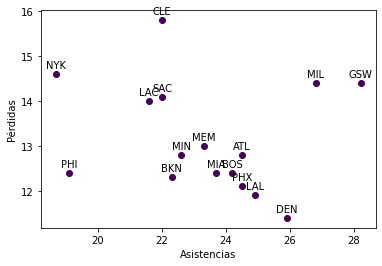

In [26]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar los puntos de datos según las etiquetas de los clusters
for i, label in enumerate(labels):
    x = Tabla_cluster_2023.iloc[i, 0]
    y = Tabla_cluster_2023.iloc[i, 1]
    Abbreviation = Tabla_cluster_2023.iloc[i, 2]
    ax.scatter(x, y, c=label)
    ax.text(x, y+0.2, Abbreviation, ha='center', va='center')

# Configurar etiquetas de los ejes
ax.set_xlabel('Asistencias')
ax.set_ylabel('Pérdidas')

# Mostrar el gráfico
plt.show()
# En este código, hemos agregado la variable teampara almacenar el valor de la columna 'Team' correspondiente a cada punto de datos. Luego, utilizamos la función ax.text()para mostrar la etiqueta del equipo en el punto correspondiente. El parametro ha='center'y va='center'centra el texto en cada punto.

### 4.3. Puntos vs Puntos recibidos

In [27]:
Tabla_cluster_2023 = Tabla_final_2023[['PTS','Opp PTS','Abbreviation']]
Tabla_cluster_2023_corta =  Tabla_final_2023[['PTS','Opp PTS']]

In [28]:
Tabla_cluster_2023

,PTS,Opp PTS,Abbreviation
0,118.8,124.0,MIL
1,115.8,121.2,ATL
2,115.6,122.0,LAC
3,114.2,116.5,PHX
4,113.7,115.9,SAC
5,116.4,108.1,DEN
6,113.1,113.2,GSW
7,112.3,109.9,LAL
8,112.0,108.6,BOS
9,111.7,107.4,MIA


In [29]:
# Tomamos ahora 3 clusters
kmeans = KMeans(n_clusters=3)

# Ajustar el modelo a los datos
kmeans.fit(Tabla_cluster_2023_corta)

# Obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Imprimir los resultados
print("Etiquetas de los clusters:", labels)
print("Centroides:", centroids)

Etiquetas de los clusters: [0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1]
Centroides: [[115.62       119.92      ]
 [ 97.325      101.8       ]
 [110.8        110.51428571]]


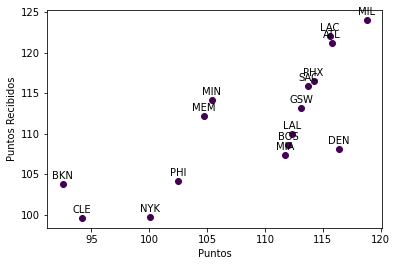

In [30]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar los puntos de datos según las etiquetas de los clusters
for i, label in enumerate(labels):
    x = Tabla_cluster_2023.iloc[i, 0]
    y = Tabla_cluster_2023.iloc[i, 1]
    Abbreviation = Tabla_cluster_2023.iloc[i, 2]
    ax.scatter(x, y, c=label)
    ax.text(x, y+1, Abbreviation, ha='center', va='center')

# Configurar etiquetas de los ejes
ax.set_xlabel('Puntos')
ax.set_ylabel('Puntos Recibidos')

# Mostrar el gráfico
plt.show()
# En este código, hemos agregado la variable teampara almacenar el valor de la columna 'Team' correspondiente a cada punto de datos. Luego, utilizamos la función ax.text()para mostrar la etiqueta del equipo en el punto correspondiente. El parametro ha='center'y va='center'centra el texto en cada punto.